# Predictive Modelling using Regression

### Question 1.
**What processing was required on this pre-processed dataset (D3.csv) to further improve the data quality for regression modelling? What distribution split between training and test datasets have you used?**

Although the dataset was pre-processed, there was still additional processing taken to improve the quality and usefulness of the data when used for regression modelling, such as standardisation. Given regression models are quite sensitive to input variables of different scales, the standard scale function of scikit-learn was used to rescale all features to have a mean of 0 and a standard deviation of 1. This allows for the effective comparison of features of various scales and allows for the use of gradient descent- and ascent-based optimisations.

Additionally, some models required conversions of string fields into integers using the Pandas Get Dummies function.
In order to avoid issues with overfitting, a train/test data split of 70/30 has been used. This was established using a trial-and-error methodology.


### Question 2 (1/3).
*Build a regression model using the default regression method with  all inputs.*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def data_prep():
    df = pd.read_csv('d3.csv')

    # one-hot encoding
    df = pd.get_dummies(df)

    #Setting the target variable to RainTomorrow.
    y = df['RainTomorrow']
    X = df.drop(['RainTomorrow'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test

In [ ]:
rs = 10
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [ ]:
#Standardising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)

X_test = scaler.transform(X_test)

In [ ]:
model1 = LogisticRegression(random_state=rs, solver='lbfgs')

In [ ]:
#Default settings
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#Train and Test accuracy
print("Train accuracy:", model1.score(X_train, y_train))
print("Test accuracy:", model1.score(X_test, y_test))

#Classification report on test data
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8476088113868995
Test accuracy: 0.8469038578727792
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.73      0.50      0.59      9565

   micro avg       0.85      0.85      0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666



In [ ]:
#Default regression features
coef = model1.coef_[0]
feature_names = X.columns


indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:150]

for i in indices:
    print(feature_names[i], ':', coef[i])

Humidity3pm : 1.2169825039129465
Pressure3pm : -1.1895364620779512
Pressure9am : 0.7934231617082207
WindGustSpeed : 0.729442891520805
MaxTemp : -0.4721405105051334
Sunshine : -0.30998852651333086
Cloud3pm : 0.275561511186938
Temp3pm : 0.23628749668923762
MinTemp : 0.22030030415049776
Location_MountGinini : -0.18009242242326745
WindSpeed3pm : -0.17857020656186373
Rainfall : 0.1756161209055656
Location_Wollongong : -0.14086437374948435
Humidity9am : 0.1314169478407638
Location_Perth : 0.10887978484423678
Location_NorahHead : -0.10688801162937711
Temp9am : 0.10535183261122015
Location_Townsville : -0.09285879603284188
Location_Hobart : -0.09228015331681928
Location_Adelaide : 0.09188161721663779
Location_PerthAirport : 0.08505328128963825
WindDir3pm_NW : 0.08375835588505956
WindDir3pm_NNW : 0.08104625529492915
Location_Brisbane : 0.08068914748930721
Location_Archerfield : 0.07776092942961275
Location_Witchcliffe : 0.07106983056955593
Location_GoldCoast : -0.06925114988846497
Location_Pear

### Question 2 (2/3).
*Build another regression model tuned with GridSearchCV.*

In [ ]:
def data_prep():
    df = pd.read_csv('d3.csv')

    # one-hot encoding
    df = pd.get_dummies(df)

    #Setting the target variable to RainTomorrow.
    y = df['RainTomorrow']
    X = df.drop(['RainTomorrow'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test

In [ ]:
rs = 10
df,X,y,X_train, X_test, y_train, y_test = data_prep()

#Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [ ]:
#GridsearchCV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
model2 = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
model2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
result_set = model2.cv_results_
print(result_set)

print(model2.best_params_)

{'mean_fit_time': array([0.98179471, 1.40677714, 2.26608145, 4.00099931, 5.36093853,
       5.74696085, 5.76946785, 5.77977557, 5.8460319 , 5.55518227]), 'std_fit_time': array([0.19583139, 0.06961484, 0.05366142, 0.03493735, 0.13611176,
       0.0948567 , 0.09526997, 0.06034233, 0.11084038, 0.33821033]), 'mean_score_time': array([0.00831468, 0.00426285, 0.009376  , 0.01093831, 0.00632575,
       0.00781307, 0.00685124, 0.00220048, 0.00518758, 0.00625041]), 'std_score_time': array([0.00745002, 0.00457652, 0.01036524, 0.00716081, 0.00510104,
       0.00781307, 0.00737237, 0.00271349, 0.00698853, 0.00765515]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

In [ ]:
#Train and Test accuracy for GridSearchCV tuned with all inputs.
#clf.fit(X_train, y_train)
print("Train accuracy:", model2.score(X_train, y_train))
print("Test accuracy:", model2.score(X_test, y_test))

y_pred = model2.predict(X_test)

Train accuracy: 0.8476188562876056
Test accuracy: 0.8469038578727792


### Question 2 (3/3).
*Choose another model and answer the following questions:*

In [ ]:
def data_prep():
    df = pd.read_csv('d3.csv')

    #df = pd.get_dummies(df)
    df = df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
    df = pd.get_dummies(df)

    #Setting the target variable to Rain Tomorrow.
    y = df['RainTomorrow']
    X = df.drop(['RainTomorrow'], axis=1)


    #y = df['RainTomorrow']
    #X = df.drop(['RainTomorrow', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test

In [ ]:
rs = 10
df,X,y,X_train, X_test, y_train, y_test = data_prep()

#Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [ ]:
#GridsearchCV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
model3 = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=2, n_jobs=-1)
model3.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
result_set = model3.cv_results_
print(result_set)

print(model3.best_params_)

{'mean_fit_time': array([0.37644041, 0.47105515, 0.7447089 , 1.2408396 , 1.77314973,
       1.86262178, 1.89018321, 1.89792037, 1.81149113, 1.51948071]), 'std_fit_time': array([0.00050008, 0.00306952, 0.01447785, 0.07455122, 0.05006099,
       0.05966616, 0.03499269, 0.02143526, 0.01477826, 0.01858616]), 'mean_score_time': array([0.01500404, 0.02207291, 0.02047896, 0.01631582, 0.01581562,
       0.01562512, 0.02069116, 0.01562548, 0.02229548, 0.01562989]), 'std_score_time': array([1.19209290e-07, 6.87837601e-05, 5.25474548e-04, 6.88195229e-04,
       1.88231468e-04, 8.34465027e-07, 4.68707085e-03, 2.86102295e-06,
       4.64630127e-03, 3.69548798e-06]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

**2a. Explain why you chose that model.**

*This model has been chosen as it expands upon the previous two (default and default with GridSearchCV tuning) models to further improve its performance. It utilises some variable reduction to improve the timeliness of running the model, while also increasing the accuracy slightly.*

**2b. Name the regression function used.**

*This model uses the logistical regression function.*

**2c. Did you apply standardization of variables? Why would you normalise
the variables for regression mining?**

*Standardization has been applied to the variables. This was essential as there was different scales and units of measurements being compared, such as windspeed kilometres and rainfall millimetres. The process of standardization has put all variables onto the same scale, allowing for meaningful insights to be made in regard to the relationship of the variable and the target, and minimises the risk of misleading results.*

**2d. Report the variables included in the regression model.**

*This model includes a slightly reduced number of variables when compared to the initial models. The variables of WindGustDir, WindDir9am and WindDir3pm have been removed for two reasons. The first is that these variables added a significant amount of uncessary bulk to the dataset, as they had to be separated into individual fields for each of the types using the Pandas Get Dummies function. Secondly, they were removed as these are all relative factors depending on the location they were recorded at, and don't necessarily assist in predicting whether it will rain or not in any given location. Apart from these exceptions, all other variables have been included.*

**2e. Report the top-5 important variables (in the order) in the model.**

In [ ]:
coef = model3.best_estimator_.coef_[0]
feature_names = X.columns

indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

Pressure3pm : -1.3004339841637484
Humidity3pm : 1.1988579824840062
Pressure9am : 0.8609275954545342
WindGustSpeed : 0.752234396752489
MaxTemp : -0.450477973974446


**2f. What is the classification accuracy on training and test datasets?**

In [ ]:
#clf.fit(X_train, y_train)

print("Train accuracy:", model3.score(X_train, y_train))
print("Test accuracy:", model3.score(X_test, y_test))

#Classification report on test data
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8463130191958053
Test accuracy: 0.8474429287957624
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.74      0.50      0.59      9565

   micro avg       0.85      0.85      0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666



**2g. Report any sign of overfitting in this model.**

*The test accuracy very slightly outperforms the training accuracy, indicating that overfitting is unlikely. Due to the small variance, it is likely that the model generalises well.*

### Question 3.
**Build another regression model on the reduced variables set. Perform
dimensionality reduction with recursive feature elimination. Tune the model with GridSearchCV to find the best parameter setting.**

In [ ]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 67
Number of features after elimination 47


In [ ]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [ ]:
#GridsearchCV (maybe use the one from above)
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**3a. Was dimensionality reduction useful to identify a good feature set for
building the accurate model?**

*There was very similar performance between the pre- and post-feature elimination performance on the training and testing accuracy, with training performance improving slightly and testing performance decreasing slightly.

However, the refinement of the features provides valuable insight into the likely indicators of rainfall which were previously hidden.
*

**3b. What is the classification accuracy on training and test datasets?**

In [ ]:
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8465641417134592
Test accuracy: 0.8471147986687292
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.74      0.49      0.59      9565

   micro avg       0.85      0.85      0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666



**3c. Report any sign of overfitting.**


*Similarly to the previous model, the test accuracy again very slightly outperforms the training accuracy, indicating that overfitting is unlikely.*

**3d. Report the top-3 important variables (in the order) in the model.**

In [ ]:
coef = rfe_cv.best_estimator_.coef_[0]
feature_names = X.columns

indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:3]

for i in indices:
    print(feature_names[i], ':', coef[i])

Humidity9am : 1.1475774475136673
Pressure9am : -1.0741298173032268
Sunshine : 0.7239309307750793


### Question 4.
**Produce the ROC curve for all different regression models. Using the best
regression model, can you provide general characteristics that infer the model to predict rain tomorrow?**

*There are only small variations between each of the ROC curves produced. Unsurprisingly, this means that each of the 4 models have a similar ROC index of around 0.87.

This indicates that the model is quite effective at accurately identifying negative classes as negatives and positive classes as positives with regard to our target variable of RainTomorrow.*

ROC index on test for `default model, tuned': 0.8721511170179729


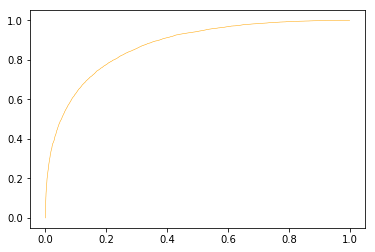

In [ ]:
#1
from sklearn.metrics import roc_auc_score
y_pred_proba_def = model2.predict_proba(X_test)
roc_index_def = roc_auc_score(y_test, y_pred_proba_def[:, 1])
print("ROC index on test for `default model, tuned':", roc_index_def)

from sklearn.metrics import roc_curve
fpr_def, tpr_def, thresholds_def = roc_curve(y_test, y_pred_proba_def[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_def, tpr_def, label='ROC Curve for `default` {:.3f}'.format(roc_index_def), color='orange', lw=0.5)

ROC index on test for `default model, tuned': 0.8721511170179729


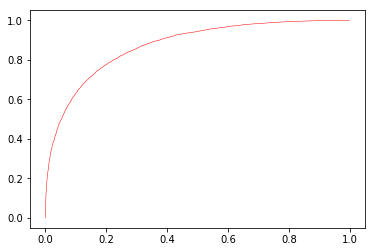

In [ ]:
#2
from sklearn.metrics import roc_auc_score
y_pred_proba_def_cv = model2.predict_proba(X_test)
roc_index_def_cv = roc_auc_score(y_test, y_pred_proba_def_cv[:, 1])
print("ROC index on test for `default model, tuned':", roc_index_def_cv)

from sklearn.metrics import roc_curve
fpr_def_cv, tpr_def_cv, thresholds_def_cv = roc_curve(y_test, y_pred_proba_def_cv[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_def_cv, tpr_def_cv, label='ROC Curve for `def_cv` {:.3f}'.format(roc_index_def_cv), color='red', lw=0.5)

ROC index on test for `custom variable model, tuned': 0.8699664081544339


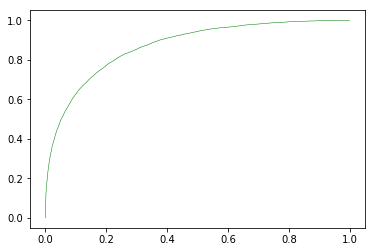

In [ ]:
#3
from sklearn.metrics import roc_auc_score
y_pred_proba_cus_model = model3.predict_proba(X_test)
roc_index_cus_model = roc_auc_score(y_test, y_pred_proba_cus_model[:, 1])
print("ROC index on test for `custom variable model, tuned':", roc_index_cus_model)

from sklearn.metrics import roc_curve
fpr_cus_model, tpr_cus_model, thresholds_cus_model = roc_curve(y_test, y_pred_proba_cus_model[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_cus_model, tpr_cus_model, label='ROC Curve for `cus_model` {:.3f}'.format(roc_index_cus_model), color='green', lw=0.5)

ROC index on test for 'custom variable model, feature reduction, tuned': 0.8694927228775153


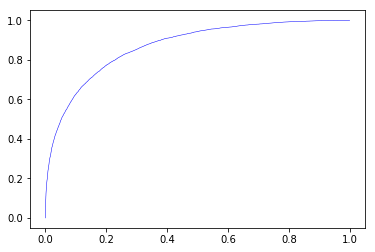

In [ ]:
#4
from sklearn.metrics import roc_auc_score
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
print("ROC index on test for 'custom variable model, feature reduction, tuned':", roc_index_rfe_cv)

from sklearn.metrics import roc_curve
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)